### Delhi Delights

In [30]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

%matplotlib inline

In [7]:
df = pd.read_csv('DelhiDelightsData.csv')

In [8]:
df.head()

,Rating,Orders_month,Purchase
0,1.5,11,Yes
1,2.5,11,No
2,2.5,11,No
3,3.5,11,No
4,3.5,11,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        30 non-null     float64
 1   Orders_month  30 non-null     int64  
 2   Purchase      30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [15]:
X = df.drop('Purchase', axis = 1)
y = df['Purchase']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [17]:
X_train.shape, X_test.shape

((21, 2), (9, 2))

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, criterion='gini')
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [33]:
def get_dt_graph(dt_classifer):
    dot_data = StringIO()

    export_graphviz(dt_classifer, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    return graph

In [31]:
def evaluate_model(dt_classifier):
    y_pred_train = dt_classifier.predict(X_train)
    y_pred_test = dt_classifier.predict(X_test)

    print("Train set performance")
    print("Accuracy: ", accuracy_score(y_train, y_pred_train))
    print("Confusion matrix: \n", confusion_matrix(y_train, y_pred_train))
    print("--" * 50)
    print("Test set performance")
    print("Accuracy: ", accuracy_score(y_test, y_pred_test))
    print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_test))

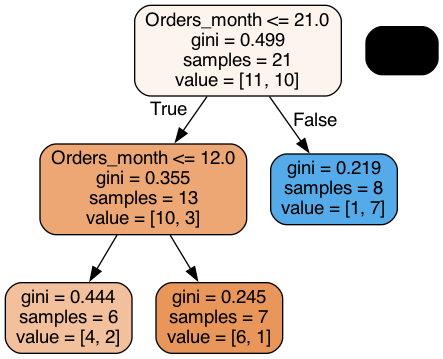

In [34]:
gph = get_dt_graph(dt)
Image(gph.create_png())

In [32]:
evaluate_model(dt)

Train set performance
Accuracy:  0.8095238095238095
Confusion matrix: 
 [[10  1]
 [ 3  7]]
----------------------------------------------------------------------------------------------------
Test set performance
Accuracy:  0.6666666666666666
Confusion matrix: 
 [[3 1]
 [2 3]]
